<a href="https://colab.research.google.com/github/vincimech010233/QuantumComputingJourney-/blob/main/All_Tied_Up_Codercises_Pennylane_with_Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pennylane qiskit qiskit_aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.w

In [5]:
import pennylane as qml
import numpy as np


In [4]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

def apply_cnot(basis_id, num_wires=2):
    qc = QuantumCircuit(num_wires)

    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    for i, bit in enumerate(bits):
        if bit == 1:
            qc.x(i)

    qc.cx(0, 1)

    qc.save_statevector()

    simulator = AerSimulator()

    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()

    statevector = result.get_statevector(compiled_circuit)

    return statevector

for basis_id in range(4):
    state = apply_cnot(basis_id)
    print(f"Basis ID: {basis_id}, Resulting State: {state}")

cnot_truth_table = {
    "00": "00",
    "01": "01",
    "10": "11",
    "11": "10"
}

print("CNOT Truth Table:", cnot_truth_table)

Basis ID: 0, Resulting State: Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Basis ID: 1, Resulting State: Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))
Basis ID: 2, Resulting State: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))
Basis ID: 3, Resulting State: Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
CNOT Truth Table: {'00': '00', '01': '01', '10': '11', '11': '10'}


Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


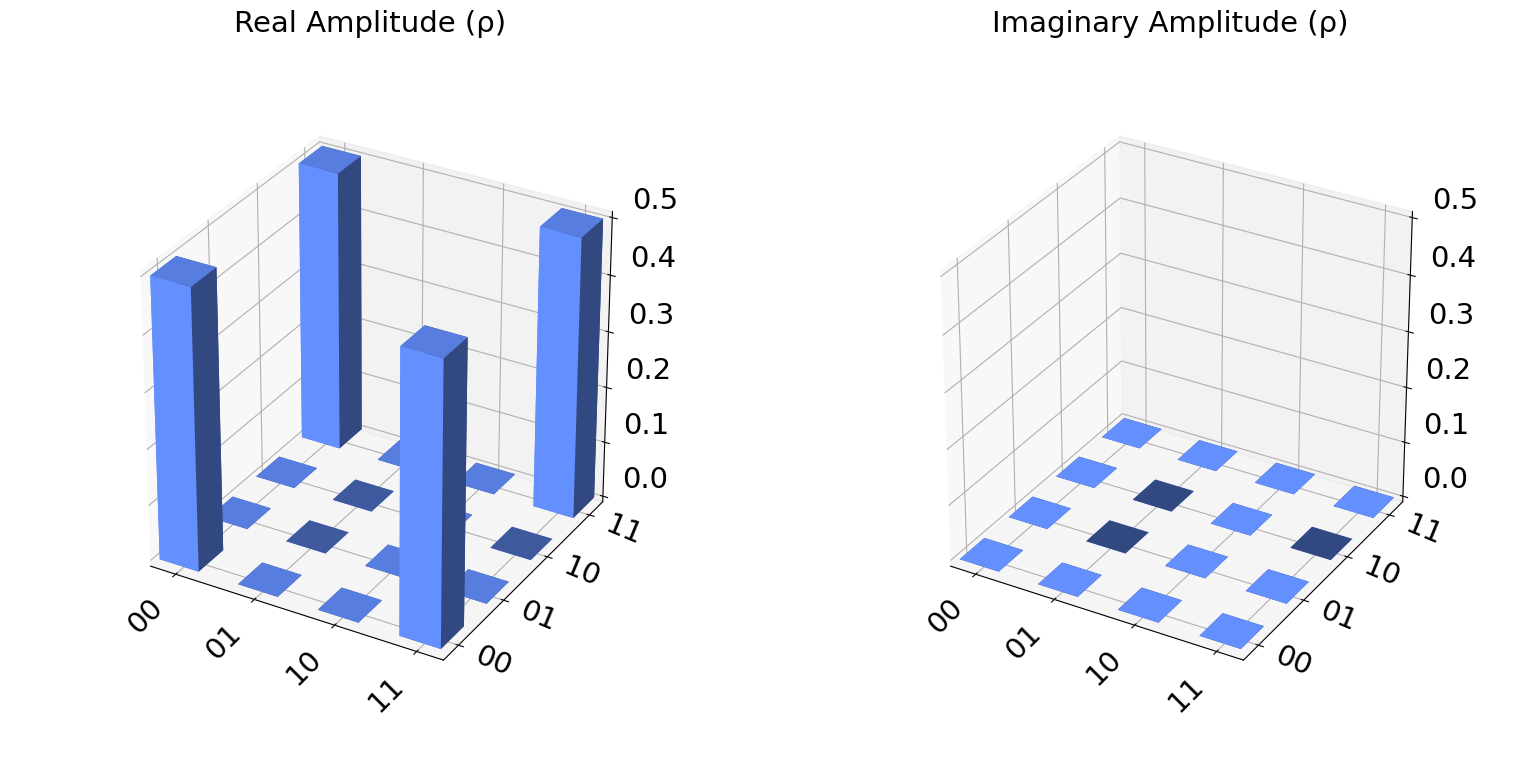

In [7]:
from qiskit.visualization import plot_state_city

def apply_h_cnot():
    qc = QuantumCircuit(2)

    qc.h(0)

    qc.cx(0, 1)

    qc.save_statevector()

    simulator = AerSimulator()

    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()

    statevector = result.get_statevector(compiled_circuit)

    return statevector

state = apply_h_cnot()
print(state)

state_status = "entangled"

plot_state_city(state)